# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | peace river
Processing Record 3 of Set 1 | coquimbo
Processing Record 4 of Set 1 | kamaishi
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | polyarnyy
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | narvik
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | zyryanskoye
Processing Record 12 of Set 1 | ofunato
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | shahr-e babak
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | san antonio de pale
Processing Record 22 of Set 1 | por

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]


# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,272.96,88,95,5.43,GS,1731376041
1,peace river,56.2501,-117.2860,275.32,93,100,2.57,CA,1731376043
2,coquimbo,-29.9533,-71.3436,287.03,69,0,3.09,CL,1731375777
3,kamaishi,39.2667,141.8833,286.43,52,87,1.74,JP,1731376045
4,adamstown,-25.0660,-130.1015,295.02,64,100,1.27,PN,1731376046


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,272.96,88,95,5.43,GS,1731376041
1,peace river,56.2501,-117.2860,275.32,93,100,2.57,CA,1731376043
2,coquimbo,-29.9533,-71.3436,287.03,69,0,3.09,CL,1731375777
3,kamaishi,39.2667,141.8833,286.43,52,87,1.74,JP,1731376045
4,adamstown,-25.0660,-130.1015,295.02,64,100,1.27,PN,1731376046


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

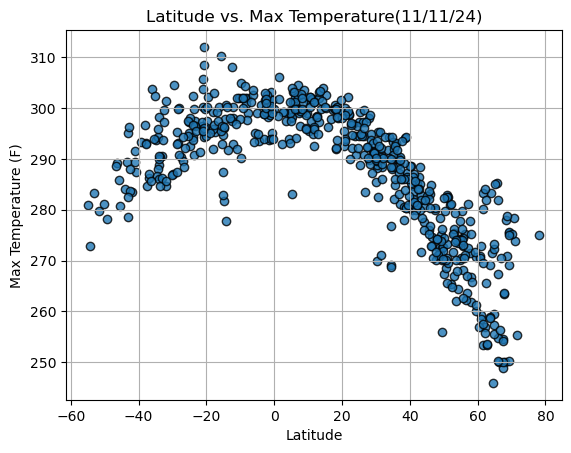

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="cities")

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

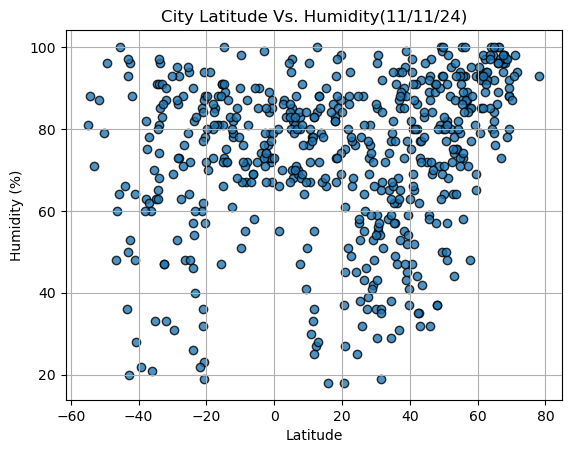

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

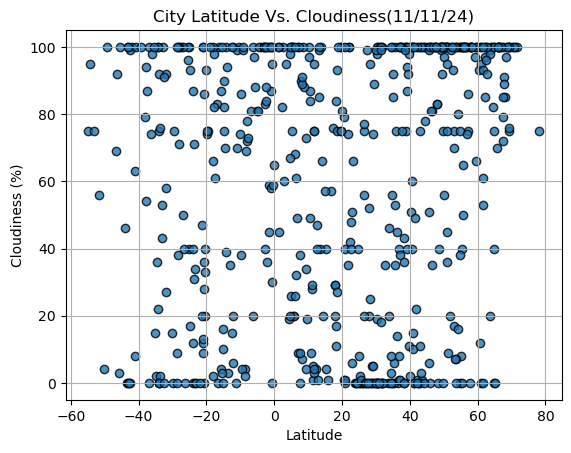

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [82]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            windspeed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Wind speed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

NameError: name 'windspeed' is not defined

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y= " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()


In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,peace river,56.2501,-117.2860,275.32,93,100,2.57,CA,1731376043
3,kamaishi,39.2667,141.8833,286.43,52,87,1.74,JP,1731376045
5,polyarnyy,69.1989,33.4478,275.51,88,100,6.83,RU,1731376047
7,iskateley,67.6803,53.1512,263.53,98,91,2.59,RU,1731376049
8,narvik,68.4384,17.4272,278.04,97,97,2.81,NO,1731376050


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,272.96,88,95,5.43,GS,1731376041
2,coquimbo,-29.9533,-71.3436,287.03,69,0,3.09,CL,1731375777
4,adamstown,-25.0660,-130.1015,295.02,64,100,1.27,PN,1731376046
6,ushuaia,-54.8000,-68.3000,280.96,81,75,1.03,AR,1731376048
9,west island,-12.1568,96.8225,300.14,78,100,6.69,CC,1731376051


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8724493089466392


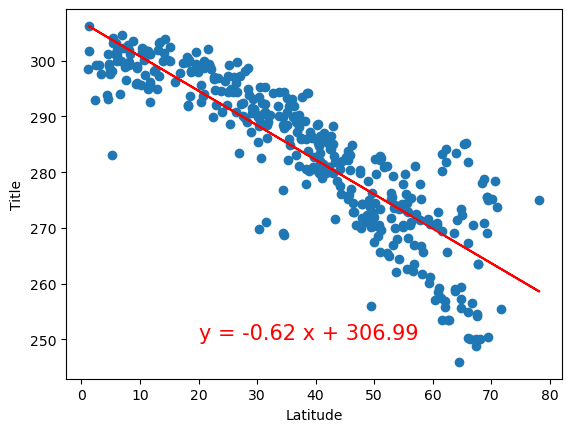

In [81]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (20,250))



The r-squared is: 0.6225834620327201


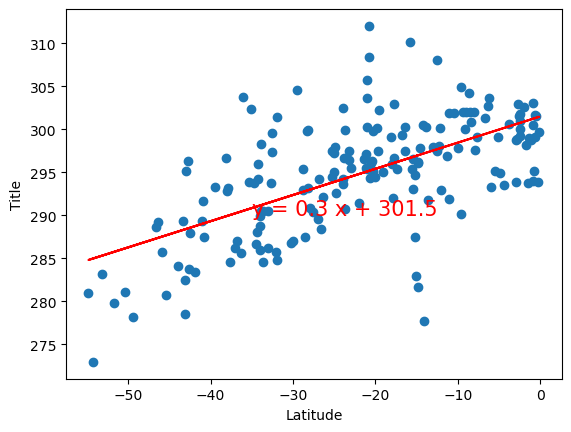

In [79]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-35,290))

**Discussion about the linear relationship:** the r2 value on the first graph is -.8 which means that the there is an inverse relationship between latitude and temperature. The r2 value on the second graph is .6 which means that there is less of correlation between latitude and humidity.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.31164312228868646


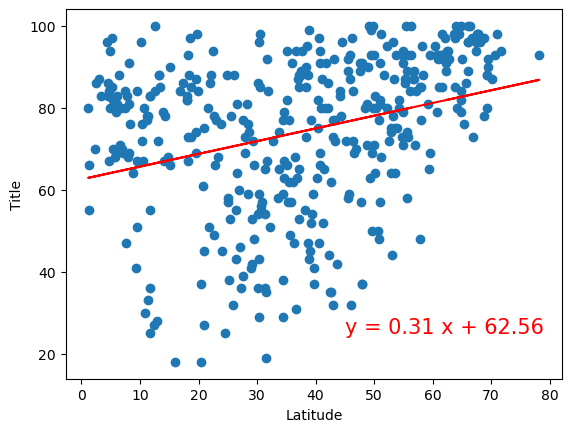

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (45,25))

The r-squared is: 0.16345266127432642


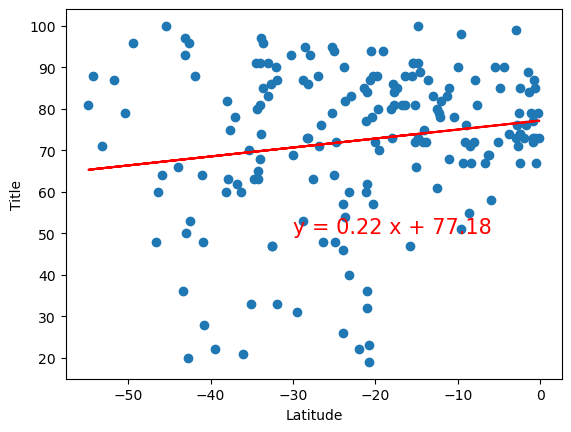

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,50))

**Discussion about the linear relationship:** There is little to no correlation between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.2715113668392811


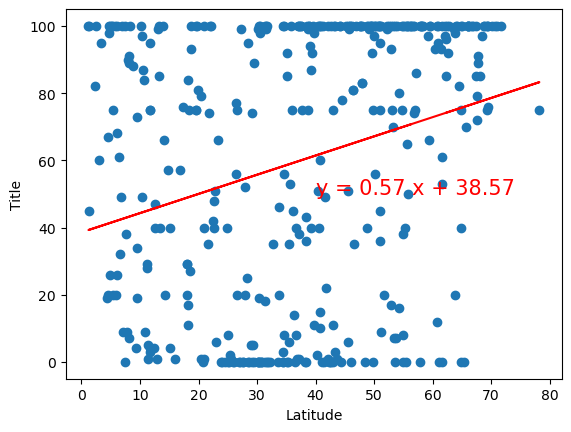

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,50))

The r-squared is: 0.1099952149353724


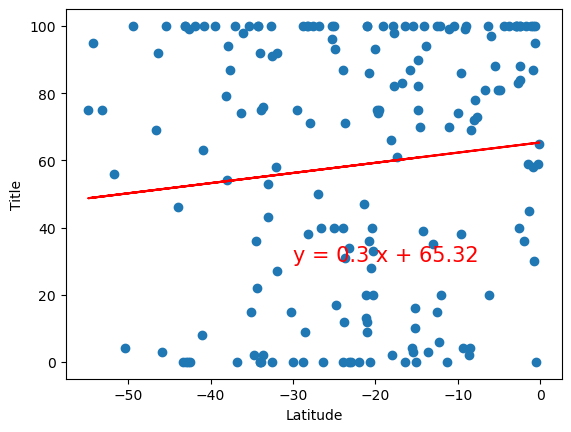

In [67]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** There is no correlation between latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.23584091448981545


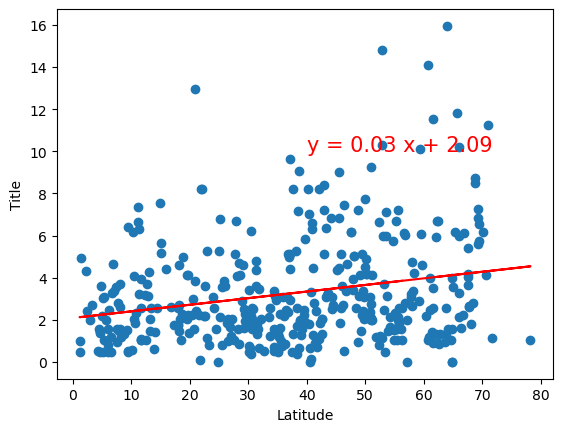

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,10))

The r-squared is: -0.25855532937610326


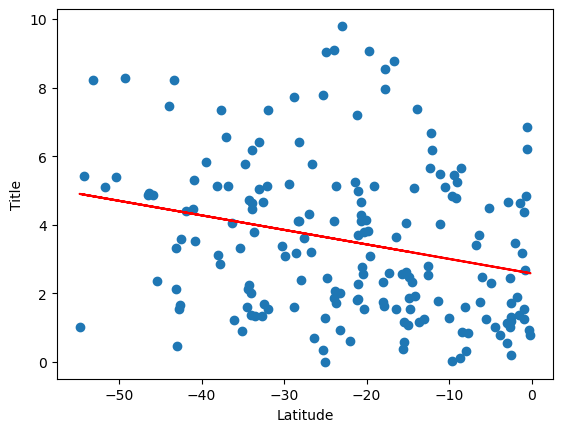

In [75]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** There's no correlation between wind speed and latitude.